In [1]:
#Mount your google colab
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


**Detailed description about the dataset**

* This is the dataset of Netflix Tv shows and movies.
* It was created by Victor Soeiro in 5th November,2022.
* I got access to the dataset through Kaggle Datasets(https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('/content/drive/MyDrive/AI EDA /titles.csv')  #Accessing the titles.csv files inside the Drive


**Inspecting The Data :**

In [3]:
df.info()  #Listing out the columns of dataset with non null counts and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1999 non-null   object 
 1   title                 1998 non-null   object 
 2   type                  1999 non-null   object 
 3   description           1996 non-null   object 
 4   release_year          1999 non-null   int64  
 5   age_certification     1344 non-null   object 
 6   runtime               1999 non-null   int64  
 7   genres                1999 non-null   object 
 8   production_countries  1999 non-null   object 
 9   seasons               667 non-null    float64
 10  imdb_id               1925 non-null   object 
 11  imdb_score            1905 non-null   float64
 12  imdb_votes            1903 non-null   float64
 13  tmdb_popularity       1965 non-null   float64
 14  tmdb_score            1894 non-null   float64
dtypes: float64(5), int64(

In [4]:
df.head() #Viewing first 5 rows

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [5]:
df.tail() #Viewing last 5 rows

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1994,ts79020,Hitler's Circle of Evil,SHOW,"Surviving power struggles, betrayals and plots...",2018,TV-14,52,"['documentation', 'history', 'war']",['GB'],1.0,tt6600720,8.0,4322.0,5.542,7.5
1995,ts84779,Haunted,SHOW,Real people sit down with friends and family t...,2018,TV-MA,25,"['documentation', 'horror', 'reality']",['US'],3.0,tt9077192,4.6,3193.0,19.435,7.0
1996,tm411415,If I Leave Here Tomorrow: A Film About Lynyrd ...,MOVIE,The story of Lynyrd Skynyrd; The Greatest Amer...,2018,NaN,94,"['documentation', 'music']",['US'],NaN,tt6214722,7.9,1285.0,3.925,7.7
1997,ts83561,Immortals,SHOW,"Driven by revenge, human-turned-vampire Mia se...",2018,TV-MA,47,"['scifi', 'action', 'drama', 'fantasy', 'thril...",['TR'],1.0,tt8063174,5.4,3087.0,13.712,6.5
1998,tm370392,The Week Of,MOVIE,The parents of a soon-to-be married couple mak...,2018,PG-13,116,['comedy'],['US'],NaN,tt6821012,5.2,21855.0,10.240,5.4


In [6]:
df=df.drop(["seasons"], axis=1) #Removing the seasons column since it has many missing values

In [7]:
df.size #Total size of data frame

27986

In [8]:
df.shape #Dimensions of data frame

(1999, 14)

In [9]:
df.dtypes #listing the types of data present in each column

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

After analyzing and inspecting the dataset we can see the almost similar number of object type data and numeric data. The total size of datset is seen to be 27986, shape is (1994,14).

**Data Cleaning:**

In [10]:
#Column who have missing values

missing_value=df.isnull().any()
print("Column with missing values: ")
print(missing_value[missing_value].index.tolist())

Column with missing values: 
['title', 'description', 'age_certification', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']


In [11]:
df.isna().sum()  #Number of missing value from each column

id                        0
title                     1
type                      0
description               3
release_year              0
age_certification       655
runtime                   0
genres                    0
production_countries      0
imdb_id                  74
imdb_score               94
imdb_votes               96
tmdb_popularity          34
tmdb_score              105
dtype: int64

In [12]:
missing_value=df.isna().sum().sum()  # Total missing value from dataset
print("\nTotal missing values from the dataset: ", missing_value)


Total missing values from the dataset:  1062


Here are some of the reason for missing values in those columns:

1. Age certification:
Not every movie or tv shows have age certification which is a major factor.

2. IMDb and TMDb related variables:
Some movies or tv shows are less popular and isnot associated with IMDb rating and TMDb association leading to missing rating and values.


In [13]:
#Filling the missing values of title, description, age certificate, imdb id, tmdb popularity, imdb score, imdb votes and tmdb score

df['title'].fillna('Ramos Trex', inplace=True)

df['description']=df['description'].fillna(' ')

mode_age_certification=df['age_certification'].mode().values[0]
df['age_certification']=df['age_certification'].fillna(mode_age_certification)

mode_imdb_id=df['imdb_id'].mode().values[0]
df['imdb_id']=df['imdb_id'].fillna(mode_imdb_id)

mode_tmdb_popularity=df['tmdb_popularity'].mode().values[0]
df['tmdb_popularity']=df['tmdb_popularity'].fillna(mode_tmdb_popularity)

mean_imdb_score=df['imdb_score'].mean()
df['imdb_score']=df['imdb_score'].fillna(mean_imdb_score)

mean_imdb_votes=df['imdb_votes'].mean()
df['imdb_votes']=df['imdb_votes'].fillna(mean_imdb_votes)

mean_tmdb_score=df['tmdb_score'].mean()
df['tmdb_score']=df['tmdb_score'].fillna(mean_tmdb_score)

#Displaying the dataframe after filling the missing values
print(df)

            id                                              title   type  \
0     ts300399                Five Came Back: The Reference Films   SHOW   
1      tm84618                                        Taxi Driver  MOVIE   
2     tm154986                                        Deliverance  MOVIE   
3     tm127384                    Monty Python and the Holy Grail  MOVIE   
4     tm120801                                    The Dirty Dozen  MOVIE   
...        ...                                                ...    ...   
1994   ts79020                            Hitler's Circle of Evil   SHOW   
1995   ts84779                                            Haunted   SHOW   
1996  tm411415  If I Leave Here Tomorrow: A Film About Lynyrd ...  MOVIE   
1997   ts83561                                          Immortals   SHOW   
1998  tm370392                                        The Week Of  MOVIE   

                                            description  release_year  \
0     This col

In [14]:
df.isnull().sum()  #Checking null value after filling the missing value

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [15]:
#Finding the duplicted rows and total no of duplicted rows

rows=df[df.duplicated()]
print('Duplicate rows:')
print(rows)
Total=df.duplicated().sum()
print(f"Total duplicate rows:{Total}")
df.drop_duplicates(inplace=True)
print("After:")
print(df)
df.reset_index(drop=True,inplace=False)

Duplicate rows:
Empty DataFrame
Columns: [id, title, type, description, release_year, age_certification, runtime, genres, production_countries, imdb_id, imdb_score, imdb_votes, tmdb_popularity, tmdb_score]
Index: []
Total duplicate rows:0
After:
            id                                              title   type  \
0     ts300399                Five Came Back: The Reference Films   SHOW   
1      tm84618                                        Taxi Driver  MOVIE   
2     tm154986                                        Deliverance  MOVIE   
3     tm127384                    Monty Python and the Holy Grail  MOVIE   
4     tm120801                                    The Dirty Dozen  MOVIE   
...        ...                                                ...    ...   
1994   ts79020                            Hitler's Circle of Evil   SHOW   
1995   ts84779                                            Haunted   SHOW   
1996  tm411415  If I Leave Here Tomorrow: A Film About Lynyrd ...  MOV

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],tt0047500,6.775643,51377.402522,0.600,6.802432
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.200000,808582.000000,40.965,8.179000
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],tt0068473,7.700000,107673.000000,10.010,7.300000
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],tt0071853,8.200000,534486.000000,15.461,7.811000
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,R,150,"['war', 'action']","['GB', 'US']",tt0061578,7.700000,72662.000000,20.398,7.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,ts79020,Hitler's Circle of Evil,SHOW,"Surviving power struggles, betrayals and plots...",2018,TV-14,52,"['documentation', 'history', 'war']",['GB'],tt6600720,8.000000,4322.000000,5.542,7.500000
1995,ts84779,Haunted,SHOW,Real people sit down with friends and family t...,2018,TV-MA,25,"['documentation', 'horror', 'reality']",['US'],tt9077192,4.600000,3193.000000,19.435,7.000000
1996,tm411415,If I Leave Here Tomorrow: A Film About Lynyrd ...,MOVIE,The story of Lynyrd Skynyrd; The Greatest Amer...,2018,R,94,"['documentation', 'music']",['US'],tt6214722,7.900000,1285.000000,3.925,7.700000
1997,ts83561,Immortals,SHOW,"Driven by revenge, human-turned-vampire Mia se...",2018,TV-MA,47,"['scifi', 'action', 'drama', 'fantasy', 'thril...",['TR'],tt8063174,5.400000,3087.000000,13.712,6.500000


In [16]:
df.shape # Displaying the shape of Dataframe after data cleaning

(1999, 14)

In [17]:
df.size # Displaying the size of Dataframe after data cleaning

27986

**Summary Statistics**

For Numeric Column:

In [18]:
df.describe()  #Displaying mean,median, min, max...... of dataset

,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,1999.000000,1999.000000,1999.000000,1.999000e+03,1999.000000,1999.000000
mean,2010.431716,83.018009,6.775643,5.137740e+04,22.679991,6.802432
std,9.063518,42.841745,1.110008,1.491070e+05,73.162756,1.036531
min,1945.000000,0.000000,1.500000,6.000000e+00,0.009442,1.000000
25%,2008.000000,45.000000,6.200000,9.230000e+02,2.846500,6.200000
50%,2014.000000,90.000000,6.800000,6.370000e+03,8.110000,6.802432
75%,2016.000000,112.000000,7.600000,4.628100e+04,20.726500,7.500000
max,2018.000000,240.000000,9.500000,2.294231e+06,2226.231000,10.000000


In [19]:
variance=df.var(ddof=1)  #Calculating the variance of dataset
print(f"The variance of dataset is :\n {variance.to_string(index=False)}")

The variance of dataset is :
 8.214736e+01
1.835415e+03
1.232117e+00
2.223291e+10
5.352789e+03
1.074397e+00


<ipython-input-19-6940308b08fd>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance=df.var(ddof=1)  #Calculating the variance of dataset


For Categorical Column:

In [20]:
object_columns=df.select_dtypes(include=['object'])     #Finding unique value in characters variable
for column in object_columns:
  unique_vals=df[column].unique()
  print(f"Unique value for {column}:{unique_vals}")


Unique value for id:['ts300399' 'tm84618' 'tm154986' ... 'tm411415' 'ts83561' 'tm370392']
Unique value for title:['Five Came Back: The Reference Films' 'Taxi Driver' 'Deliverance' ...
 'If I Leave Here Tomorrow: A Film About Lynyrd Skynyrd' 'Immortals'
 'The Week Of']
Unique value for type:['SHOW' 'MOVIE']
Unique value for description:['This collection includes 12 World War II-era propaganda films — many of which are graphic and offensive — discussed in the docuseries "Five Came Back."'
 'A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived decadence and sleaze feed his urge for violent action.'
 "Intent on seeing the Cahulawassee River before it's turned into one huge lake, outdoor fanatic Lewis Medlock takes his friends on a river-rafting trip they'll never forget into the dangerous American back-country."
 ...
 'The story of Lynyrd Skynyrd; The Greatest American Rock Band Ever. We fly beyond Free Bird to celebrate the life & 

In [21]:
mode_values=df[object_columns.columns].mode().iloc[0]   #Mode of character variable
print("\n Mode of character variables:")
print(mode_values)


 Mode of character variables:
id                                 tm100015
title                   A Lion in the House
type                                  MOVIE
description                                
age_certification                         R
genres                           ['comedy']
production_countries                 ['US']
imdb_id                           tt0047500
Name: 0, dtype: object


In [22]:
# Time period of movie released
min_date=df['release_year'].min()
max_date=df['release_year'].max()

print("Time period for the observations:")
print("Start Date: ", min_date)
print("End Date: ", max_date)

Time period for the observations:
Start Date:  1945
End Date:  2018


**Visualizing the Data**

**Univariate Analysis:**

Making Chart:

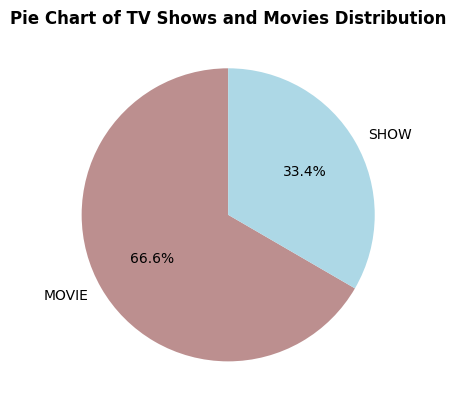

In [23]:
#Displaying Pie Chart of TV Shows and Movies Distribution

plt.figure(figsize=(8,8))
plt.subplot(2,1,2)
type_counts=df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['rosybrown', 'lightblue'])
plt.title('Pie Chart of TV Shows and Movies Distribution', fontweight='bold')
plt.tight_layout()
plt.show()

This piechart provides the landscape of distribution of Movies and TV Shows where movies is found to be (66.6%) and TV Shows at (33.4%).

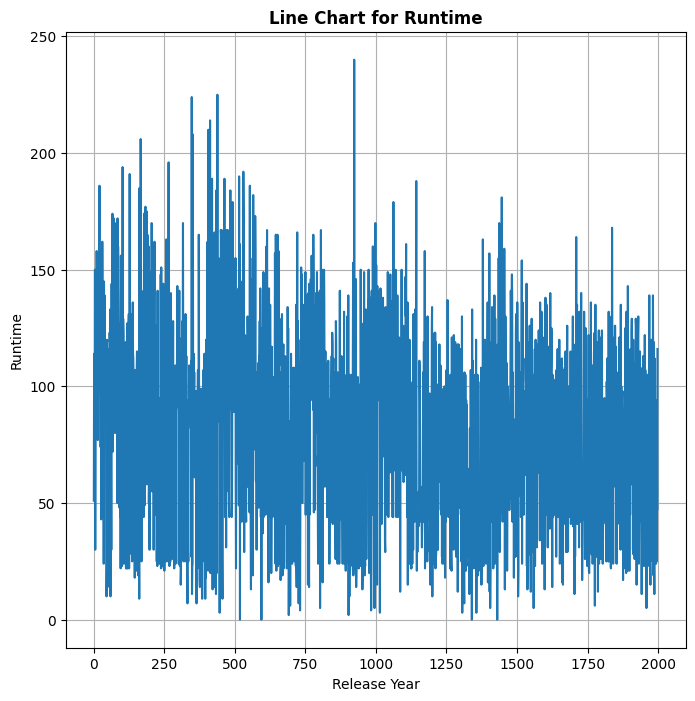

In [24]:
#Line Chart for Movie and TV Shows Runtime in different years
plt.figure(figsize=(8,8))

plt.plot(df['runtime'])
plt.title('Line Chart for Runtime', fontweight='bold')
plt.xlabel('Release Year')
plt.ylabel('Runtime')
plt.grid(True)
plt.show()

The above figure presents a simple visual exploration of Tv Shows and Movies Runtime across different years where x axis represent years and y axis represents the runtime.

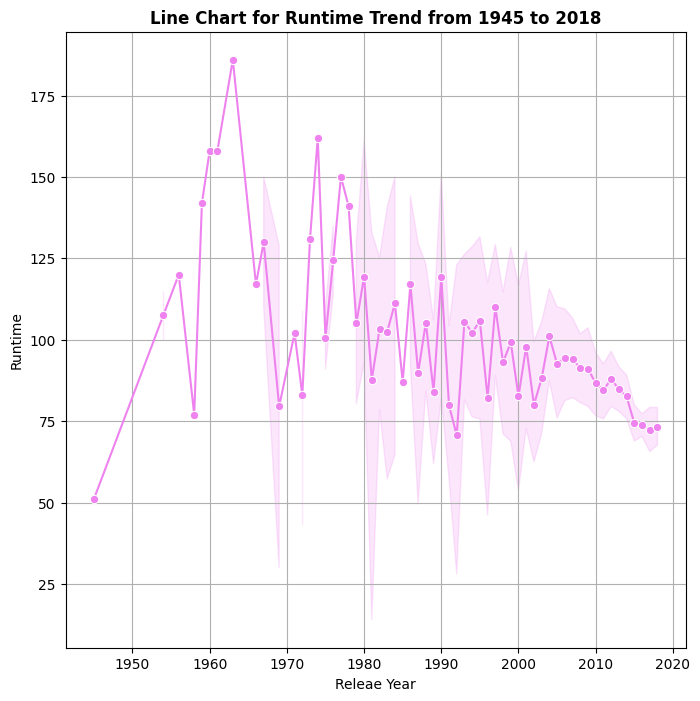

In [25]:
#Line chart for Runtime with a smoothed line

plt.figure(figsize=(8,8))

sns.lineplot(x='release_year', y='runtime', data=df,estimator='mean', marker='o', color='violet')
plt.title('Line Chart for Runtime Trend from 1945 to 2018', fontweight='bold')
plt.xlabel('Releae Year')
plt.ylabel('Runtime')
plt.grid(True)
plt.show()

This line chart also represents the same visual exploration of TV Shows and Movies Runtime but taking the mean data(runtime) from each year.

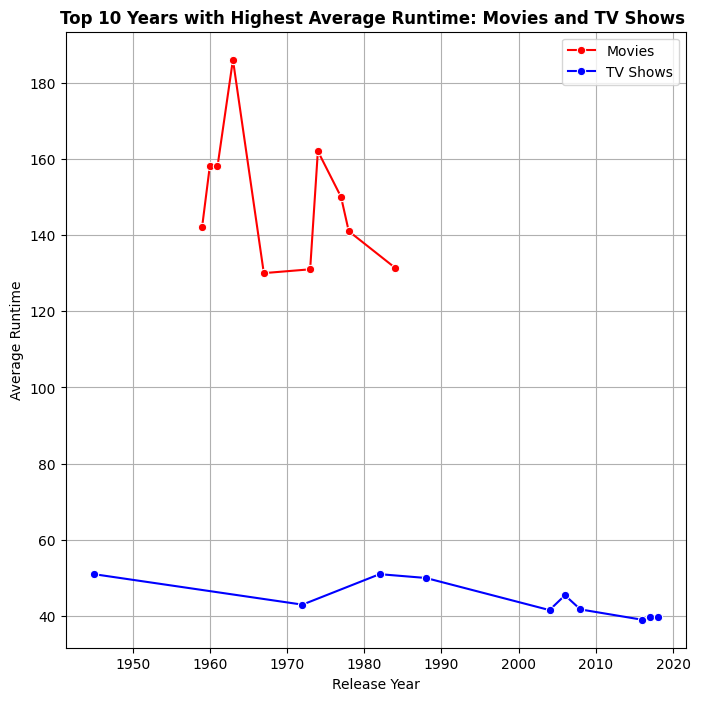

In [26]:
#Top 10 year with highest year runtime

mean_runtime_by_year_movies=df[df['type']=='MOVIE'].groupby('release_year')['runtime'].mean()
mean_runtime_by_year_tvshows=df[df['type']=='SHOW'].groupby('release_year')['runtime'].mean()

top_10_highest_years_movies=mean_runtime_by_year_movies.nlargest(10)
top_10_highest_years_tvshows=mean_runtime_by_year_tvshows.nlargest(10)

plt.figure(figsize=(8,8))

sns.lineplot(x=top_10_highest_years_movies.index, y=top_10_highest_years_movies, marker='o', color='red', label='Movies')
sns.lineplot(x=top_10_highest_years_tvshows.index, y=top_10_highest_years_tvshows, marker='o', color='blue', label='TV Shows')

plt.title('Top 10 Years with Highest Average Runtime: Movies and TV Shows ', fontweight='bold')
plt.xlabel('Release Year')
plt.ylabel('Average Runtime')
plt.grid(True)
plt.legend()
plt.show()

In the above chart , we can see top 10 highest average TV Shows and Movie Runtime ranging in different year where red color represent Movie Runtime and blue color represent Tv Shows Runtime.

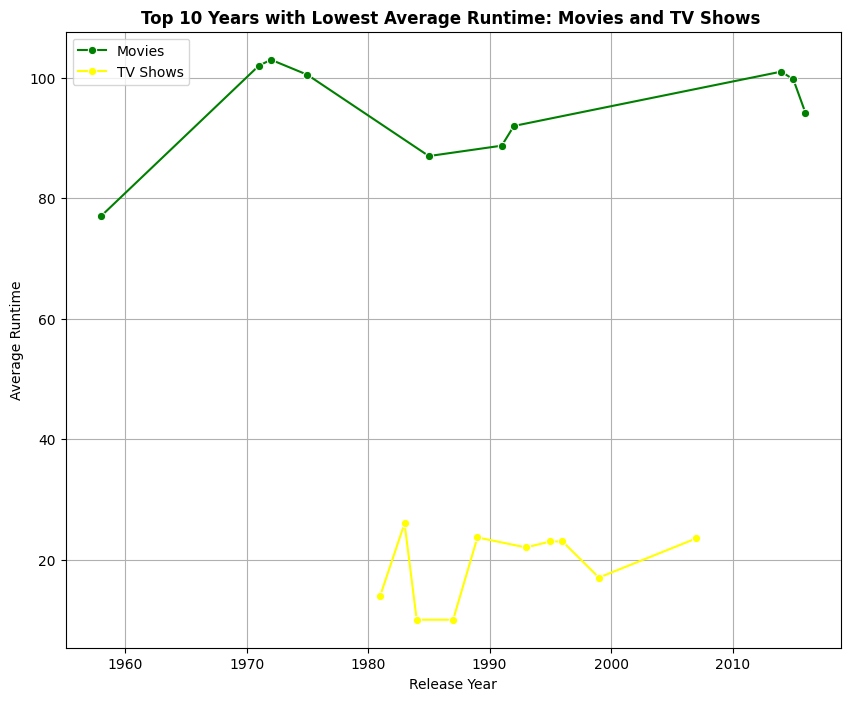

In [27]:
#Top 10 year with lowest year runtime

mean_runtime_by_year_movies=df[df['type']=='MOVIE'].groupby('release_year')['runtime'].mean()
mean_runtime_by_year_tvshows=df[df['type']=='SHOW'].groupby('release_year')['runtime'].mean()

top_10_lowest_years_movies=mean_runtime_by_year_movies.nsmallest(10)
top_10_lowest_years_tvshows=mean_runtime_by_year_tvshows.nsmallest(10)

plt.figure(figsize=(10,8))

sns.lineplot(x=top_10_lowest_years_movies.index, y=top_10_lowest_years_movies, marker='o', color='green', label='Movies')
sns.lineplot(x=top_10_lowest_years_tvshows.index, y=top_10_lowest_years_tvshows, marker='o', color='yellow', label='TV Shows')

plt.title('Top 10 Years with Lowest Average Runtime: Movies and TV Shows ', fontweight='bold')
plt.xlabel('Release Year')
plt.ylabel('Average Runtime')
plt.grid(True)
plt.legend()
plt.show()

This above figure shows the Top 10 lowest average runtime for TV Shows and Movies where green color represent Movies Runtime and yellow color represent Tv Shows Runtime.

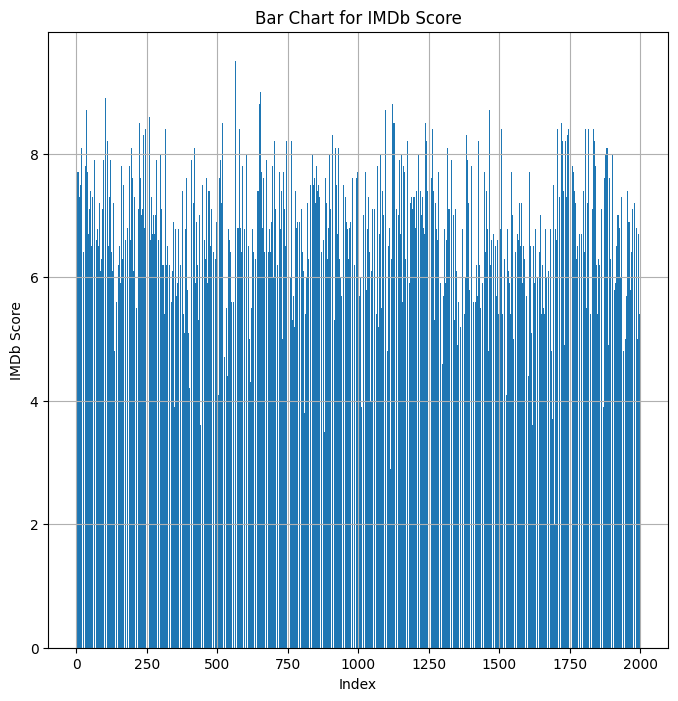

In [28]:
#Bar Chart for IMDb Score

plt.figure(figsize=(8,8))

plt.bar(df.index, df['imdb_score'])
plt.title('Bar Chart for IMDb Score')
plt.xlabel('Index')
plt.ylabel('IMDb Score')
plt.grid(True)
plt.show()

The above visuals shows the brief chart of IMDb Score got by TV Shows and Movies in different years.

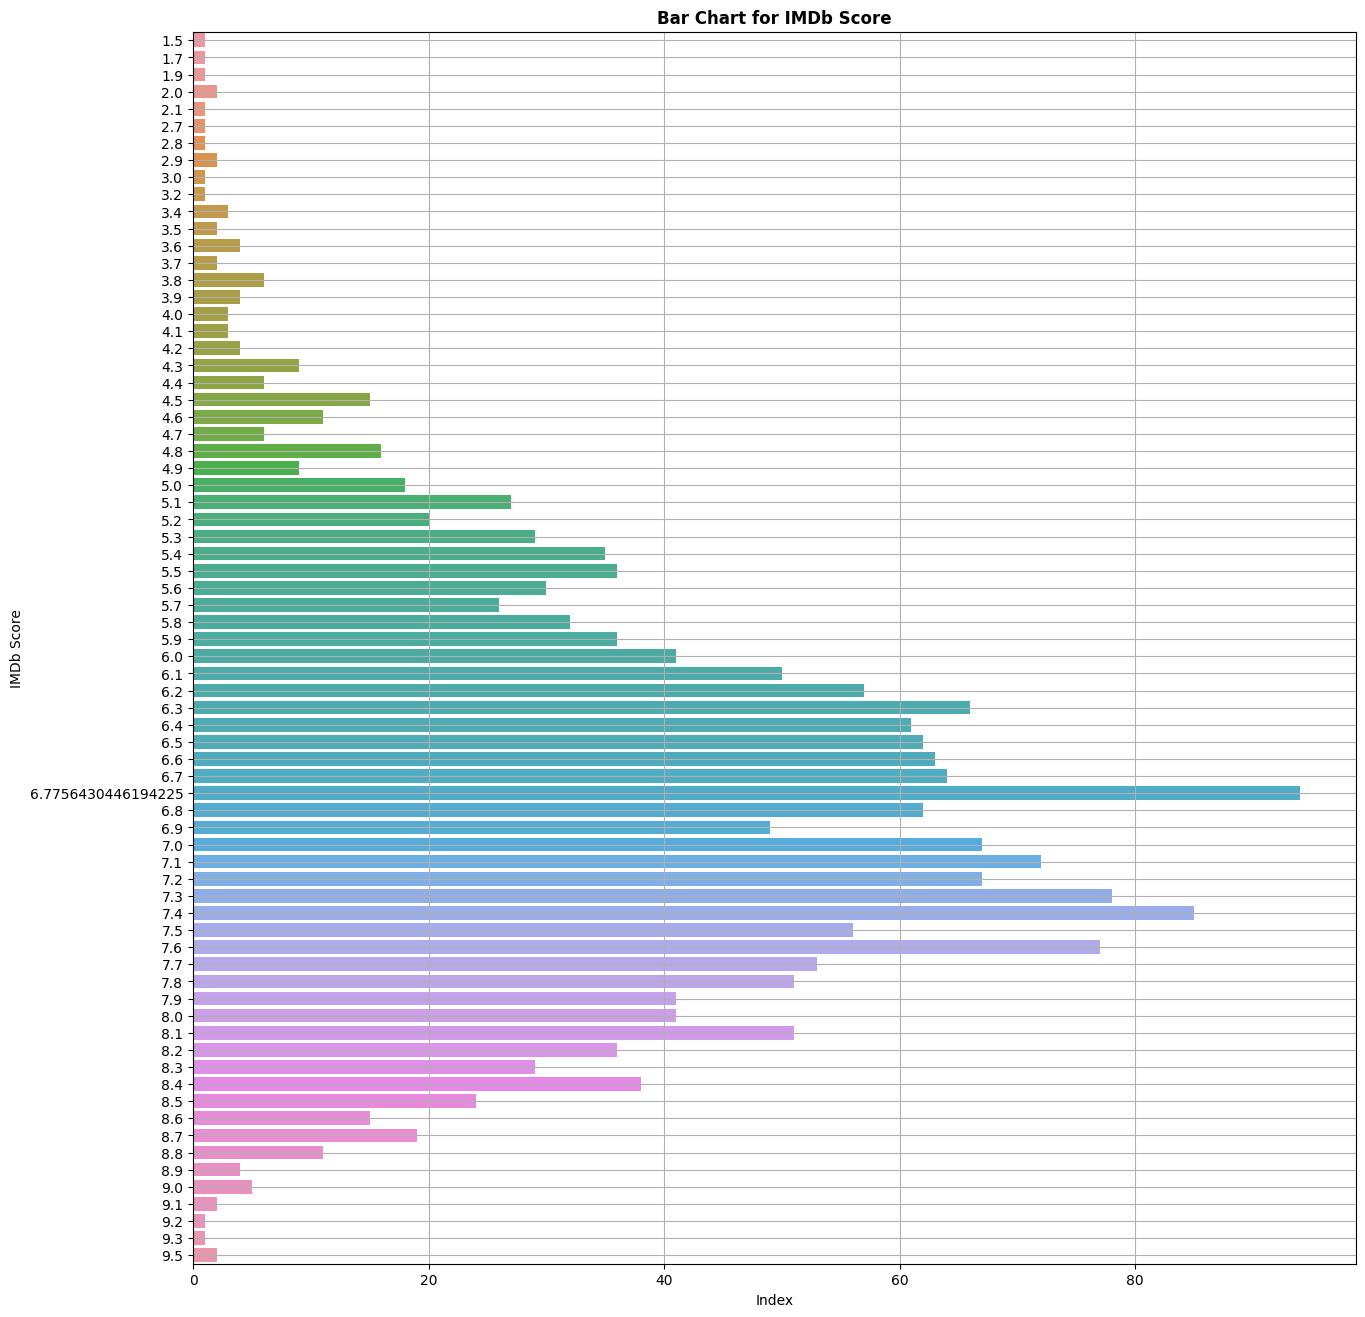

In [29]:
#Bar Chart for IMDb Score

plt.figure(figsize=(15,16))
sns.countplot(data=df,y='imdb_score')
plt.title('Bar Chart for IMDb Score', fontweight='bold')
plt.xlabel('Index')
plt.ylabel('IMDb Score')
plt.grid(True)
plt.show()

Same as above, we can see the detailed IMDb score got by TV Shows and Movies in each year.

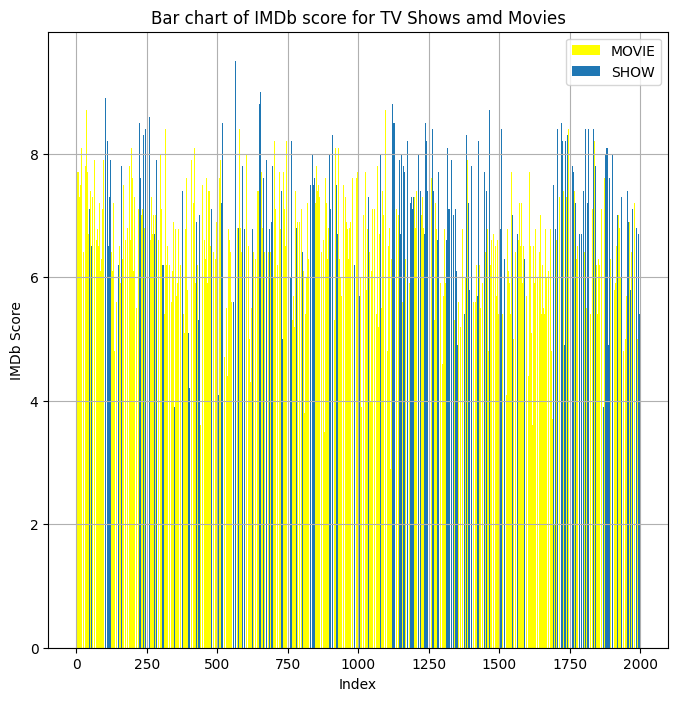

In [30]:
# Displaying Movies and TV shows IMDB score in barchart
movies_df=df[df['type']=='MOVIE']
tv_shows_df=df[df['type']=='SHOW']

plt.figure(figsize=(8,8))

plt.bar(movies_df.index, movies_df['imdb_score'], label='MOVIE', color='yellow')

plt.bar(tv_shows_df.index, tv_shows_df['imdb_score'], label='SHOW')
plt.title('Bar chart of IMDb score for TV Shows amd Movies')
plt.xlabel('Index')
plt.ylabel('IMDb Score')

plt.legend()
plt.grid(True)
plt.show()


From this chart we can clearly see the Movies and TV Shows IMDb score separately where yellow color represent movies and blue color represent Tv show.

<Figure size 800x800 with 0 Axes>

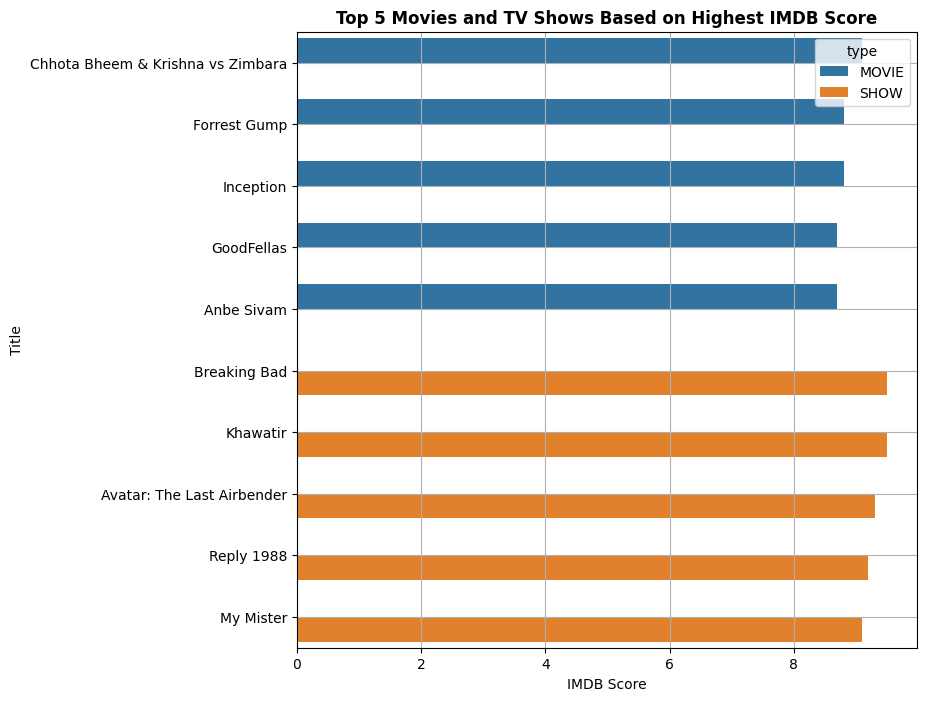

In [31]:
# Displaying Top 5 Movies and TV shows with highest IMDB score in barchart
movies_df=df[df['type']=='MOVIE']
tv_shows_df=df[df['type']=='SHOW']

plt.figure(figsize=(8,8))

top_5_Highestscore_movies=movies_df.nlargest(5,'imdb_score')
top_5_Highestscore_tv_shows=tv_shows_df.nlargest(5,'imdb_score')

plt.figure(figsize=(8,8))
combine_df=pd.concat([top_5_Highestscore_movies, top_5_Highestscore_tv_shows])

sns.barplot(x='imdb_score', y='title', hue='type', data=combine_df)

plt.title('Top 5 Movies and TV Shows Based on Highest IMDB Score', fontweight='bold')
plt.xlabel('IMDB Score')
plt.ylabel('Title')

plt.grid(True)
plt.show()

The graph lists the top 5 movies(in blue) and tv shows(in orange) with highest IMDb score where movies and tv shows are displayed on horizontal axis. The coressponding IMDb score are plotted on the vertical axis ranging from 0 to 8.

<Figure size 800x800 with 0 Axes>

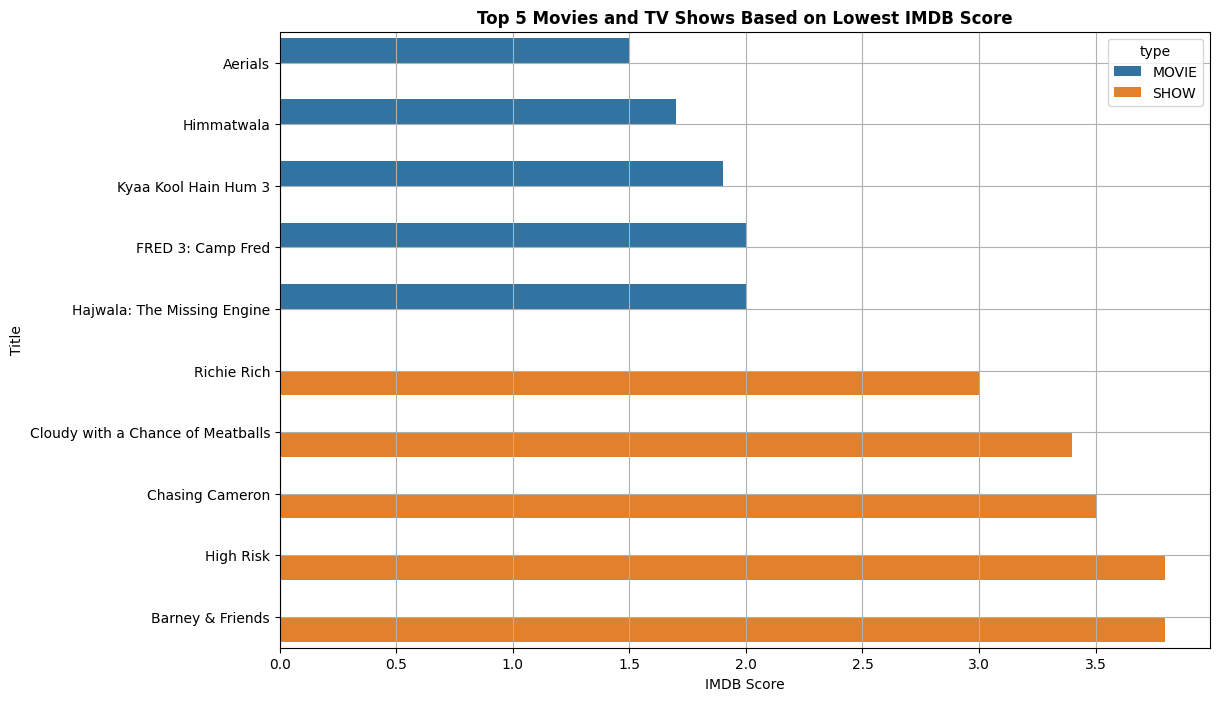

In [32]:
# Displaying Top 5 Movies and TV shows with lowest IMDB score in barchart
movies_df=df[df['type']=='MOVIE']
tv_shows_df=df[df['type']=='SHOW']

plt.figure(figsize=(8,8))

top_5_Lowestscore_movies=movies_df.nsmallest(5,'imdb_score')
top_5_Lowestscore_tv_shows=tv_shows_df.nsmallest(5,'imdb_score')

plt.figure(figsize=(12,8))
combine_df=pd.concat([top_5_Lowestscore_movies, top_5_Lowestscore_tv_shows])

sns.barplot(x='imdb_score', y='title', hue='type', data=combine_df)

plt.title('Top 5 Movies and TV Shows Based on Lowest IMDB Score', fontweight='bold')
plt.xlabel('IMDB Score')
plt.ylabel('Title')

plt.grid(True)
plt.show()

The graph displays the top 5 movies(in blue) and Tv shows(in orange) with lowest Imdb score where titles are listed horizontally and their IMDB score plotted verticall ranging from 0 to 4.

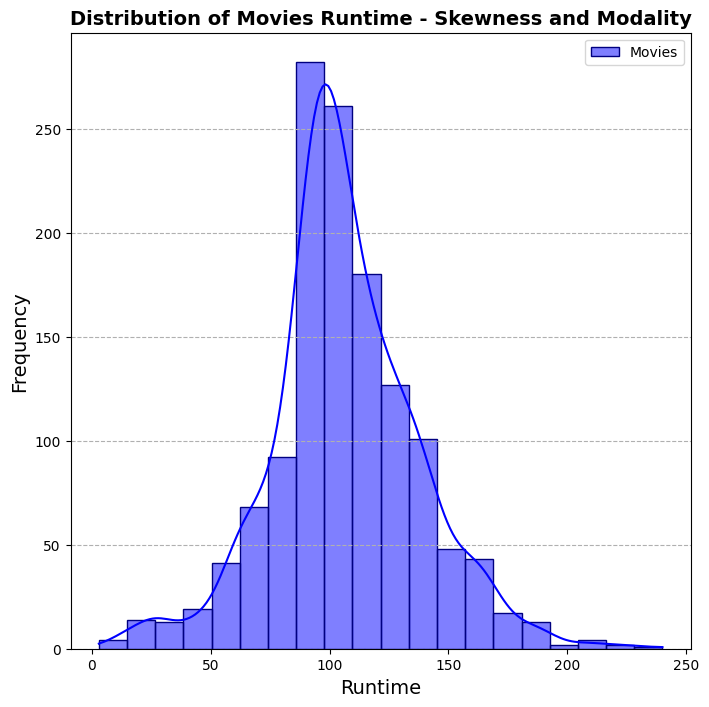

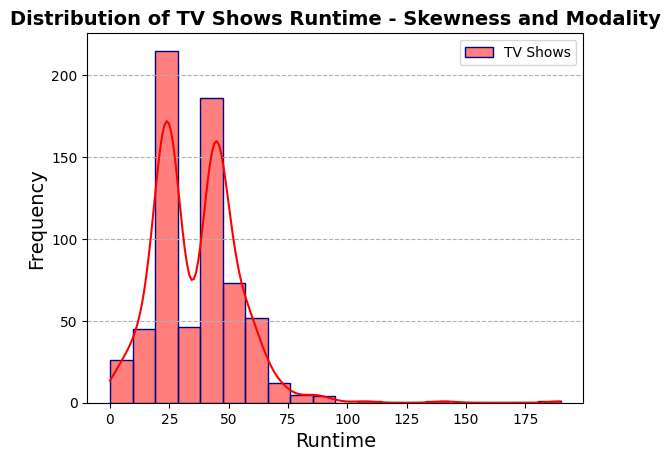

In [33]:
#Showing Histoplot of Movies and TV Show Runtime

movies_df=df[df['type']=='MOVIE']
tv_shows_df=df[df['type']=='SHOW']

plt.figure(figsize=(8,8))

#For Movies Runtime
sns.histplot(movies_df['runtime'], kde=True, color='blue', bins=20, edgecolor='navy', label='Movies')
plt.title('Distribution of Movies Runtime - Skewness and Modality', fontsize=14, fontweight='bold')

plt.xlabel('Runtime', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(axis='y', linestyle='--')
plt.legend()
plt.show()

#For TV Shows Runtime
sns.histplot(tv_shows_df['runtime'], kde=True, color='Red', bins=20, edgecolor='navy', label='TV Shows')
plt.title('Distribution of TV Shows Runtime - Skewness and Modality', fontsize=14, fontweight='bold')

plt.xlabel('Runtime', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(axis='y', linestyle='--')
plt.legend()
plt.show()

The above histogram shows the distribution of movies and tv shows runtime where x axis represents runtime ranging from 0 to 300 minutes and y axis represents frequency of movies and tv shows with a particular runtime. The height represents the no of movies and tv shows that have runtime within that range. And finally two humps represents two distinct frequency of movies and tv shows, suggesting preference for both shorter and longer runtimes.

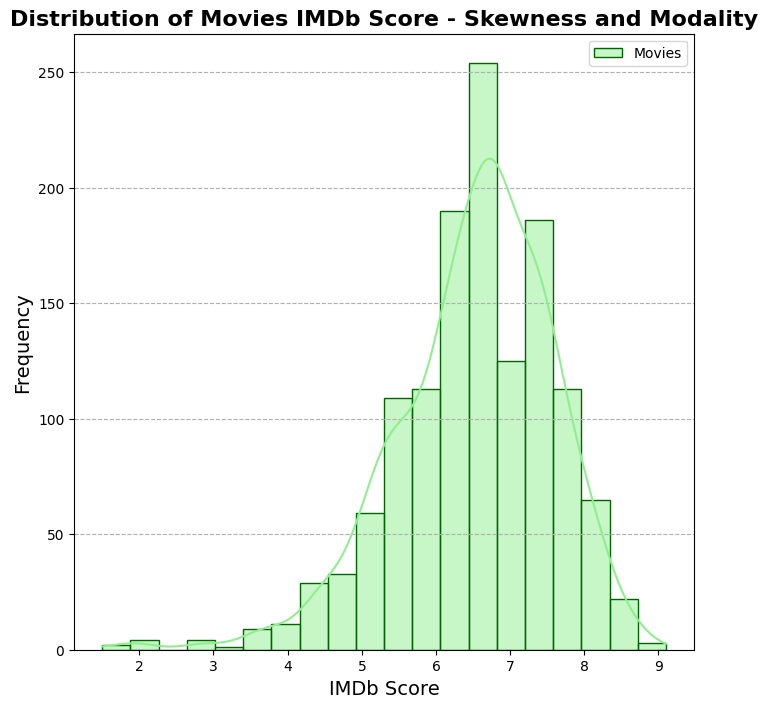

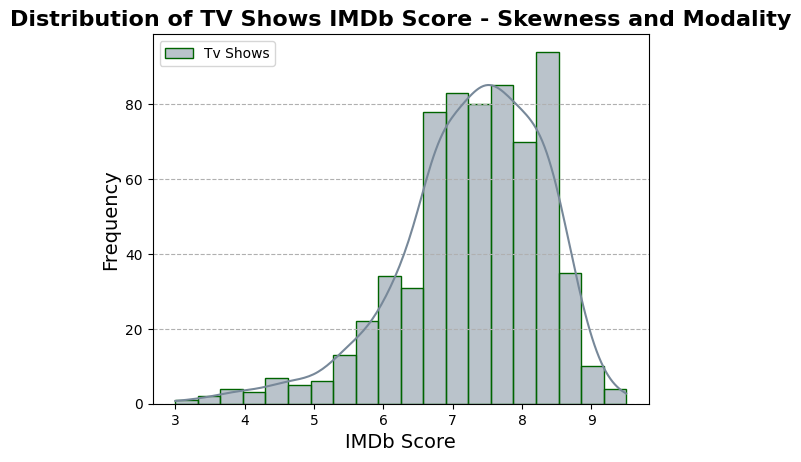

In [34]:
#Showing Histoplot of Movies and TV Shows IMDb Score
plt.figure(figsize=(8,8))

#For Movies Imdb Score
sns.histplot(movies_df['imdb_score'], kde=True, color='lightgreen', bins=20, edgecolor='darkgreen', label='Movies')
plt.title('Distribution of Movies IMDb Score - Skewness and Modality',fontsize=16, fontweight='bold')
plt.xlabel('IMDb Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(axis='y', linestyle='--')
plt.legend()
plt.show()

#For TV Shows IMDb score
sns.histplot(tv_shows_df['imdb_score'], kde=True, color='lightslategray', bins=20, edgecolor='darkgreen', label='Tv Shows')
plt.title('Distribution of TV Shows IMDb Score - Skewness and Modality',fontsize=16, fontweight='bold')
plt.xlabel('IMDb Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(axis='y', linestyle='--')
plt.legend()
plt.show()

The above figure displays the IMDB score of both movies and tv shows where x axis represent score ranging from 0 to 10 and y axis shows the frequency of movies and tv shows. There is a data skewed to the right with a longer tail towards highers score and a broad hump around the score 7(meaning most frequent score).

The boxplot visualizes the distribution of movie runtime where the bix itself represents the interquartile range(containing middle data). The horizontal line marks median runtime and the whiskers extend from minimum to maximum runtimes and points beyond the whisker are considered outliers.

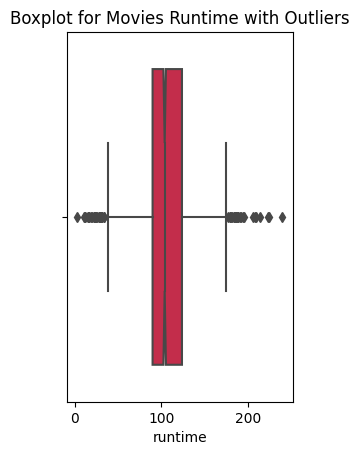

In [35]:
#Boxplot for Movies Runtime

plt.subplot(1,2,1)
sns.boxplot(x=movies_df['runtime'], color='crimson', notch=True, showfliers=True)
plt.title('Boxplot for Movies Runtime with Outliers')
plt.show()

The boxplot visualize the movies runtime where the box itself represents the interquartile range. The horizontal line marks the medain runtime and whisker range from min to max inside the box. Points beyond the whiskers are called outliers.

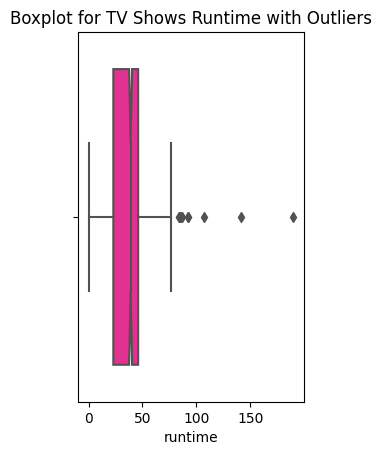

In [36]:
#Boxplot of Tv Shows Runtime
plt.subplot(1,2,1)
sns.boxplot(x=tv_shows_df['runtime'], color='deeppink', notch=True, showfliers=True)
plt.title('Boxplot for TV Shows Runtime with Outliers')
plt.show()

The boxplot visualize the TV shows runtime which contains the middle 50% of data. The horizontal line marks the median runtime and whisker extend from min to max. Finally the point beyond the whisker are considered outliers.

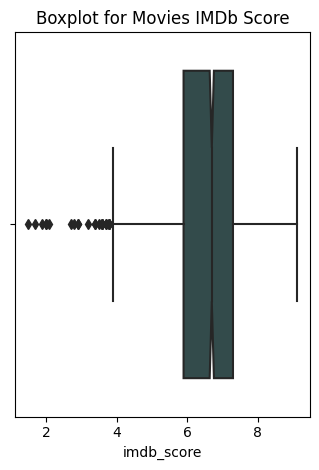

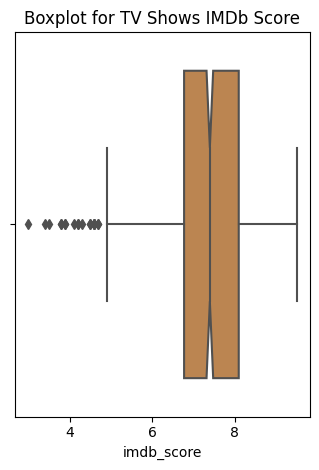

In [37]:
#Boxplot for Movies Imdb score
plt.subplot(1,2,2)
sns.boxplot(x=movies_df['imdb_score'], color='darkslategray', notch=True, showfliers=True)
plt.title('Boxplot for Movies IMDb Score')

plt.tight_layout()
plt.show()

#Boxplot for Tv Shows IMDB Score
plt.subplot(1,2,2)
sns.boxplot(x=tv_shows_df['imdb_score'], color='peru', notch=True, showfliers=True)
plt.title('Boxplot for TV Shows IMDb Score')

plt.tight_layout()
plt.show()

From the above boxplot we can see some difference in movies and tv shows IMDB score. Movies are score slightly higher on average and have wide range of ratings, also have high outliers. While tv shows have a consistent range of imdb score with few outliers.

**BI Variate Analysis:**

In [38]:
#Splitting the datset into numeric and categorical column

numeric_columns=df.select_dtypes(include=['float64', 'int64'])
categorical_columns=df.select_dtypes(include=['object'])


<Figure size 800x800 with 0 Axes>

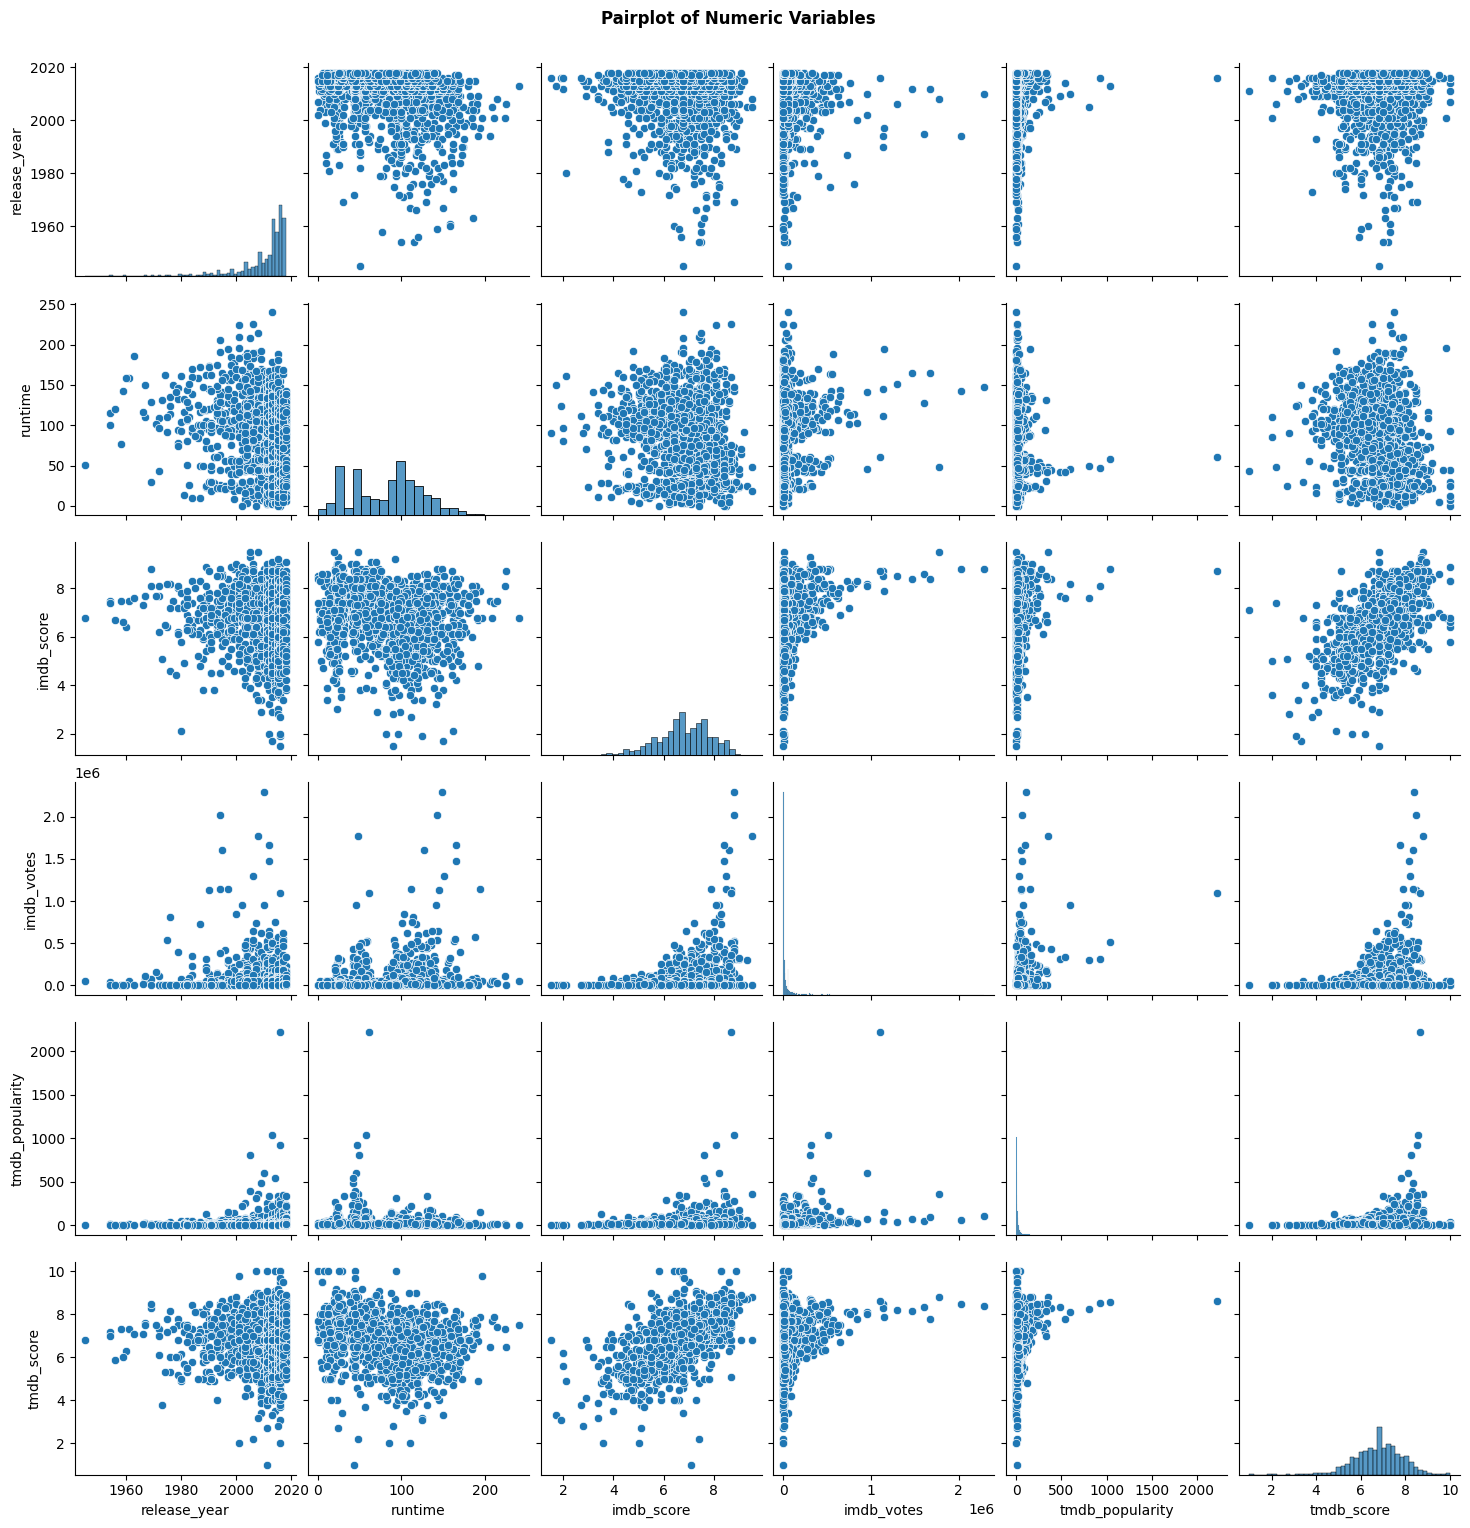

In [39]:
# Exploring correlation visualization with scatter plot
plt.figure(figsize=(8,8))

sns.pairplot(numeric_columns)
plt.suptitle('Pairplot of Numeric Variables', y=1.02, fontweight='bold')
plt.show()

This pair plots explore the relationship of TV Shows and Movies with its various aspects.

We can see how runtime, imdb score, votes, popularity and tmdb score have changed overtime. For example the runtime of movies have become shorter or higher tmdb score compare to old tv shows and movies.

The pair plots also reveals the correlations between different variable. Such as imdb score associated with tmdb popularity and other variables.

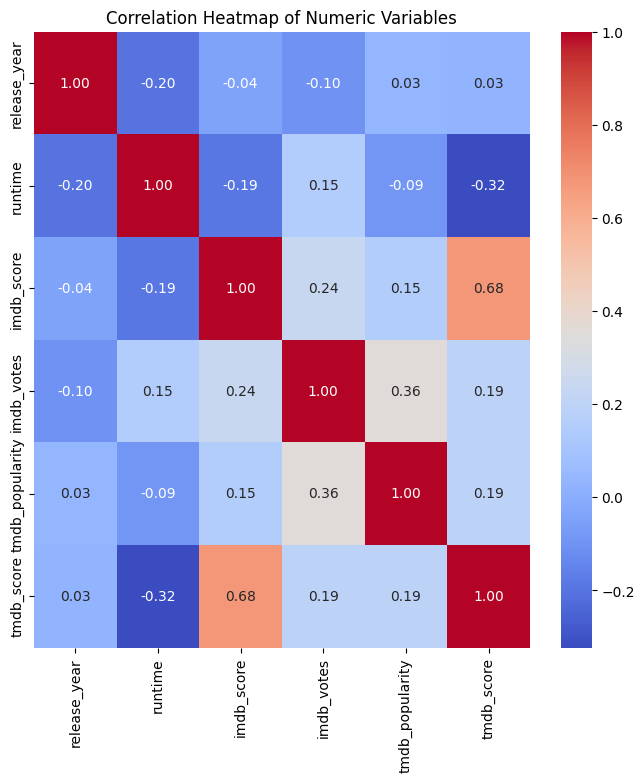

In [40]:
#Exploring Correlation visualization with heatmap
correlation_matrix=numeric_columns.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

The heatmap displays six numeric variables release year, runtime, imdb score, imdb votes . tmdb popularity and tmdb score.

The cells represents the correlation where each colors represents the strength between two variables.

**Conclusion and Reflection:**

Firstly I have plotted the pie chart providing the clear visual representation of tv shows and movies in the dataset.

Next I have taken the variable runtime and imdb score of tv shows and movies ranging from the year 1945 to 2018. I have then plotted those data in line chart, bar chart, histogram and finally boxplot.

From those chart, the reader or viewers can identify trends in runtime and imdb score over the year in both tv shows and movies where the runtime has dercreased significantly and higher imdb score.

Next from the scatter plot and heat map made from numeric variable such as release year, runtime, imdb score and soon the viewers can analyze the detailed trending of movies and tv shows through out the year and strong correlation between those variable.

Finally after researching and utilizing various data visualization techiques I have learned the distribution of content type, trends in runtime, Imdb score and variability between those dataset.